In [1]:
import numpy as np

In [2]:
import pickle

In [3]:
from sklearn.utils import shuffle

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from keras.models import Model

In [6]:
from keras.layers import Activation, Dropout, UpSampling2D, concatenate, Input

In [7]:
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D

In [8]:
from tensorflow.keras.layers import BatchNormalization

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
from keras.utils.vis_utils import plot_model

In [11]:
from keras import regularizers

In [12]:
train_images = pickle.load(open("full_CNN_train.p", "rb" ))

In [13]:
labels = pickle.load(open("full_CNN_labels.p", "rb" ))

In [14]:
print(type(train_images))

<class 'list'>


In [15]:
train_images = np.array(train_images)

In [16]:
len(train_images)

12764

In [17]:
print(type(train_images))

<class 'numpy.ndarray'>


In [18]:
print(type(labels))

<class 'list'>


In [19]:
labels = np.array(labels)

In [20]:
len(labels)

12764

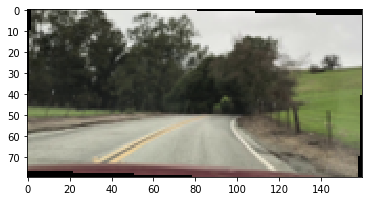

In [31]:
from matplotlib import pyplot as plt

plt.imshow(train_images[3000], interpolation='nearest')
plt.show()

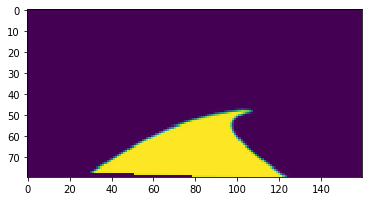

In [32]:
from matplotlib import pyplot as plt

plt.imshow(labels[3000], interpolation='nearest')
plt.show()

In [23]:
labels = labels / 255

In [24]:
train_images, labels = shuffle(train_images, labels)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

In [26]:
batch_size = 16
epochs = 15
pool_size = (2, 2)

In [27]:
Inputs = Input(batch_shape=(None, 80, 160, 3))

In [28]:
Conv1 = Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Inputs)
Bat1 = BatchNormalization()(Conv1)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization/gamma:0' shape=(16,) dtype=float32>
  <tf.Variable 'batch_normalization/beta:0' shape=(16,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [29]:
Conv2 = Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Conv1)
Bat2 = BatchNormalization()(Conv2)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_1), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_1/gamma:0' shape=(16,) dtype=float32>
  <tf.Variable 'batch_normalization_1/beta:0' shape=(16,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [30]:
Pool1 = MaxPooling2D(pool_size=pool_size)(Conv2)

In [31]:
Conv3 = Conv2D(32, (3, 3), padding = 'valid', strides=(1,1), activation = 'relu')(Pool1)
#Drop3 = Dropout(0.2)(Conv3)
Bat3 = BatchNormalization()(Conv3)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_2), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_2/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'batch_normalization_2/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [32]:
Conv4 = Conv2D(32, (3, 3), padding = 'valid', strides=(1,1), activation = 'relu')(Bat3)
#Drop4 = Dropout(0.5)(Conv4)
Bat4 = BatchNormalization()(Conv4)


The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_3), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_3/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'batch_normalization_3/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [33]:
Conv5 = Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Bat4)
#Drop5 = Dropout(0.2)(Conv5)
Bat5 = BatchNormalization()(Conv5)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_4), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_4/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'batch_normalization_4/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [34]:
Pool2 = MaxPooling2D(pool_size=pool_size)(Bat5)

In [35]:
Conv6 = Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Pool2)
#Drop6 = Dropout(0.2)(Conv6)
Bat6 = BatchNormalization()(Conv6)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_5), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_5/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'batch_normalization_5/beta:0' shape=(64,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [36]:
Conv7 = Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Bat6)
#Drop7 = Dropout(0.2)(Conv7)
Bat7 = BatchNormalization()(Conv7)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_6), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_6/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'batch_normalization_6/beta:0' shape=(64,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [37]:
Pool3 = MaxPooling2D(pool_size=pool_size)(Bat7)
 
# Conv Layer 8
Conv8 = Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Pool3)
#Drop8 = Dropout(0.2)(Conv8)
Bat8 = BatchNormalization()(Conv8)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_7), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_7/gamma:0' shape=(128,) dtype=float32>
  <tf.Variable 'batch_normalization_7/beta:0' shape=(128,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [38]:
Conv9 = Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Bat8)
#Drop9 = Dropout(0.2)(Conv9)
Bat9 = BatchNormalization()(Conv9)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_8), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_8/gamma:0' shape=(128,) dtype=float32>
  <tf.Variable 'batch_normalization_8/beta:0' shape=(128,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [39]:
Pool4 = MaxPooling2D(pool_size=pool_size)(Bat9)
 
 
#Upsample 1 to Deconv 1
Deconv1 = Conv2DTranspose(128, (2, 2), padding='valid', strides=(2,2), activation = 'relu')(Pool4)
#Up1 = UpSampling2D(size=pool_size)(Pool4)
Mer1 = concatenate([Deconv1, Bat9], axis=-1)

In [40]:
# Deconv 2
Deconv2 = Conv2DTranspose(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Mer1)
DBat2 = BatchNormalization()(Deconv2)
 
# Deconv 3
Deconv3 = Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(DBat2)
DBat3 = BatchNormalization()(Deconv3)
 
# Upsample 2 to Deconv 4
Deconv4 = Conv2DTranspose(64, (2, 2), padding='valid', strides=(2,2), activation = 'relu')(DBat3)
#Up2 = UpSampling2D(size=pool_size)(DBat2)
Mer2 = concatenate([Deconv4, Bat7], axis=-1)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_9), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_9/gamma:0' shape=(128,) dtype=float32>
  <tf.Variable 'batch_normalization_9/beta:0' shape=(128,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_10), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_10/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'batch_normalization_10/beta:0' shape=(64,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [41]:
# Deconv 5
Deconv5 = Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Mer2)
DBat5 = BatchNormalization()(Deconv5)
 
# Deconv 6
Deconv6 = Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(DBat5)
DBat6 = BatchNormalization()(Deconv6)
 
# Upsample 3 to Deconv 7
Deconv7 = Conv2DTranspose(32, (2, 2), padding='valid', strides=(2,2), activation = 'relu')(DBat6)
#Up3 = UpSampling2D(size=pool_size)(DBat4)
Mer3 = concatenate([Deconv7, Bat5], axis=-1)

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_11), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_11/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'batch_normalization_11/beta:0' shape=(64,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_12), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_12/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'batch_normalization_12/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [42]:
# Deconv 8
Deconv8 = Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Mer3)
DBat8 = BatchNormalization()(Deconv8)
 
# Deconv 9
Deconv9 = Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(DBat8)
DBat9 = BatchNormalization()(Deconv9)
 
# Deconv 10
Deconv10 = Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(DBat9)
DBat10 = BatchNormalization()(Deconv10)
 
# Upsample 4 to Deconv 11
Deconv11 = Conv2DTranspose(16, (2, 2), padding='valid', strides=(2,2), activation = 'relu')(DBat10)
#Up4 = UpSampling2D(size=pool_size)(DBat7)
Mer4 = concatenate([Deconv11, Bat2], axis=-1)


The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_13), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_13/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'batch_normalization_13/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_14), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_14/gamma:0' shape=(16,) dtype=float32>
  <tf.Variable 'batch_normalization_14/beta:0' shape=(16,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were u

In [43]:
# Deconv 12
Deconv12 = Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(Mer4)
DBat12 = BatchNormalization()(Deconv12)
 
# Deconv 13
Deconv13 = Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu')(DBat12)
DBat13 = BatchNormalization()(Deconv13)
 
# Final layer - only including one channel so 1 filter
Final = Conv2DTranspose(1, (3, 3), padding='same', strides=(1,1), activation = 'relu')(DBat13)


The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_16), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_16/gamma:0' shape=(16,) dtype=float32>
  <tf.Variable 'batch_normalization_16/beta:0' shape=(16,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_17), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_17/gamma:0' shape=(8,) dtype=float32>
  <tf.Variable 'batch_normalization_17/beta:0' shape=(8,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [44]:
model = Model(inputs=Inputs, outputs=Final)

In [45]:
# Using a generator to help the model use less data
# Channel shifts help with shadows slightly
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

MemoryError: Unable to allocate 1.64 GiB for an array with shape (11487, 80, 160, 3) and data type float32

In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

In [ ]:
# Freeze layers since training is done
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

In [44]:
# Save model architecture and weights
model.save('full_CNN_model_HYe15.h5')

In [45]:
model.summary()
plot_model(model, to_file='model.png')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 160, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 78, 158, 16)  448         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 76, 156, 16)  2320        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 38, 78, 16)   0           ['conv2d_1[0][0]']           

 conv2d_transpose_5 (Conv2DTran  (None, 16, 36, 32)  18464       ['batch_normalization_11[0][0]'] 
 spose)                                                                                           
                                                                                                  
 batch_normalization_12 (BatchN  (None, 16, 36, 32)  128         ['conv2d_transpose_5[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_transpose_6 (Conv2DTran  (None, 32, 72, 32)  4128        ['batch_normalization_12[0][0]'] 
 spose)                                                                                           
                                                                                                  
 concatenate_2 (Concatenate)    (None, 32, 72, 64)   0           ['conv2d_transpose_6[0][0]',     
          

In [46]:
import numpy as np
import cv2

In [47]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from keras.models import load_model
import matplotlib.pyplot as plt

In [49]:
# Load Keras model
model = load_model('full_CNN_model_HYe15.h5')

In [50]:
# Class to average lanes with
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

In [51]:
_name_ = "_main_"

In [65]:
def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """

    # Get image ready for feeding into model
#     numpy.array(Image.fromarray(arr).resize())

    #small_img_2 = np.array(Image.fromarray(obj=image, mode='F').resize(size=(80, 160))

    small_img_2 = cv2.resize(src = image, dsize = (160, 80))
    small_img_1 = np.array(small_img_2)
    small_img = small_img_1[None,:,:,:]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)
    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    #lane_image = np.array(mage.fromarray(obj=lane_drawn, mode='F').resize(size=(720, 1280)))
    lane_image = cv2.resize(src = lane_drawn, dsize = (1280, 720))

#     lane_image = cv2.resize(src = lane_drawn, dsize = (720, 1280))

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0, dtype = cv2.CV_32F)

    return result


if _name_ == '_main_':
    # Load Keras model
    model = load_model('full_CNN_model_HYe15.h5')
    # Create lanes object
    lanes = Lanes()

    # Where to save the output video
    vid_output = 'output.mp4'
    # Location of the input video
    clip1 = VideoFileClip("lane.mp4")
    # Create the clip
    vid_clip = clip1.fl_image(road_lines)
    vid_clip.write_videofile(vid_output, audio=False)


                                                                                                                    
t:   8%|████▉                                                           | 120/1566 [1:07:46<04:00,  6.01it/s, now=None]
                                                                                                                    
t:   8%|████▉                                                           | 120/1566 [1:07:46<04:00,  6.01it/s, now=None]

Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



                                                                                                                       
                                                                                                                    
t:   8%|████▉                                                           | 120/1566 [1:10:07<04:00,  6.01it/s, now=None]
                                                                                                                    
t:   8%|████▉                                                           | 120/1566 [1:10:07<04:00,  6.01it/s, now=None]

Moviepy - Done !
Moviepy - video ready output.mp4


In [64]:
def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """

    # Get image ready for feeding into model
#     numpy.array(Image.fromarray(arr).resize())

    #small_img_2 = np.array(Image.fromarray(obj=image, mode='F').resize(size=(80, 160))

    small_img_2 = cv2.resize(src = image, dsize = (160, 80))
    small_img_1 = np.array(small_img_2)
    small_img = small_img_1[None,:,:,:]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)
    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    #lane_image = np.array(mage.fromarray(obj=lane_drawn, mode='F').resize(size=(720, 1280)))
    lane_image = cv2.resize(src = lane_drawn, dsize = (1280, 720))

#     lane_image = cv2.resize(src = lane_drawn, dsize = (720, 1280))

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0, dtype = cv2.CV_32F)

    return result


if _name_ == '_main_':
    # Load Keras model
    model = load_model('full_CNN_model_HYe15.h5')
    # Create lanes object
    lanes = Lanes()

    # Where to save the output video
    vid_output = 'output2.mp4'
    # Location of the input video
    clip1 = VideoFileClip("lane2.mp4")
    # Create the clip
    vid_clip = clip1.fl_image(road_lines)
    vid_clip.write_videofile(vid_output, audio=False)


                                                                                                                       
t:   5%|███▍                                                               | 79/1566 [02:56<03:58,  6.23it/s, now=None]
                                                                                                                       
t:   5%|███▍                                                               | 79/1566 [02:56<03:58,  6.23it/s, now=None]

Moviepy - Building video output2.mp4.
Moviepy - Writing video output2.mp4





t:   0%|                                                                            | 0/1566 [00:00<?, ?it/s, now=None]

t:   0%|                                                                    | 2/1566 [00:00<02:32, 10.27it/s, now=None]

t:   0%|▏                                                                   | 4/1566 [00:00<03:00,  8.66it/s, now=None]

t:   0%|▏                                                                   | 5/1566 [00:00<03:23,  7.67it/s, now=None]

t:   0%|▎                                                                   | 6/1566 [00:00<03:41,  7.03it/s, now=None]

t:   0%|▎                                                                   | 7/1566 [00:00<03:49,  6.78it/s, now=None]

t:   1%|▎                                                                   | 8/1566 [00:01<03:59,  6.50it/s, now=None]

t:   1%|▍                                                                   | 9/1566 [00:01<04:37,  5.62it/s, now=None]

t:   1%|▍                     

t:   8%|█████▍                                                            | 130/1566 [00:23<04:19,  5.53it/s, now=None]

t:   8%|█████▌                                                            | 131/1566 [00:24<04:15,  5.61it/s, now=None]

t:   8%|█████▌                                                            | 132/1566 [00:24<04:10,  5.72it/s, now=None]

t:   8%|█████▌                                                            | 133/1566 [00:24<04:09,  5.75it/s, now=None]

t:   9%|█████▋                                                            | 134/1566 [00:24<03:57,  6.02it/s, now=None]

t:   9%|█████▋                                                            | 135/1566 [00:24<03:46,  6.31it/s, now=None]

t:   9%|█████▋                                                            | 136/1566 [00:24<03:57,  6.03it/s, now=None]

t:   9%|█████▊                                                            | 137/1566 [00:25<03:46,  6.31it/s, now=None]

t:   9%|█████▊                  

t:  16%|██████████▊                                                       | 258/1566 [00:51<03:59,  5.46it/s, now=None]

t:  17%|██████████▉                                                       | 259/1566 [00:51<03:54,  5.58it/s, now=None]

t:  17%|██████████▉                                                       | 260/1566 [00:51<03:56,  5.52it/s, now=None]

t:  17%|███████████                                                       | 261/1566 [00:51<04:05,  5.33it/s, now=None]

t:  17%|███████████                                                       | 262/1566 [00:51<04:07,  5.27it/s, now=None]

t:  17%|███████████                                                       | 263/1566 [00:52<03:58,  5.47it/s, now=None]

t:  17%|███████████▏                                                      | 264/1566 [00:52<03:57,  5.48it/s, now=None]

t:  17%|███████████▏                                                      | 265/1566 [00:52<03:57,  5.49it/s, now=None]

t:  17%|███████████▏            

t:  25%|████████████████▎                                                 | 386/1566 [01:14<03:32,  5.56it/s, now=None]

t:  25%|████████████████▎                                                 | 387/1566 [01:14<03:32,  5.56it/s, now=None]

t:  25%|████████████████▎                                                 | 388/1566 [01:15<03:34,  5.49it/s, now=None]

t:  25%|████████████████▍                                                 | 389/1566 [01:15<03:35,  5.45it/s, now=None]

t:  25%|████████████████▍                                                 | 390/1566 [01:15<03:39,  5.35it/s, now=None]

t:  25%|████████████████▍                                                 | 391/1566 [01:15<03:39,  5.36it/s, now=None]

t:  25%|████████████████▌                                                 | 392/1566 [01:15<03:31,  5.55it/s, now=None]

t:  25%|████████████████▌                                                 | 393/1566 [01:15<03:31,  5.54it/s, now=None]

t:  25%|████████████████▌       

t:  33%|█████████████████████▋                                            | 514/1566 [01:37<03:07,  5.61it/s, now=None]

t:  33%|█████████████████████▋                                            | 515/1566 [01:37<03:07,  5.60it/s, now=None]

t:  33%|█████████████████████▋                                            | 516/1566 [01:37<03:19,  5.26it/s, now=None]

t:  33%|█████████████████████▊                                            | 517/1566 [01:37<03:10,  5.51it/s, now=None]

t:  33%|█████████████████████▊                                            | 518/1566 [01:38<03:06,  5.63it/s, now=None]

t:  33%|█████████████████████▊                                            | 519/1566 [01:38<03:04,  5.69it/s, now=None]

t:  33%|█████████████████████▉                                            | 520/1566 [01:38<03:00,  5.79it/s, now=None]

t:  33%|█████████████████████▉                                            | 521/1566 [01:38<03:03,  5.71it/s, now=None]

t:  33%|██████████████████████  

t:  41%|███████████████████████████                                       | 642/1566 [02:01<03:34,  4.30it/s, now=None]

t:  41%|███████████████████████████                                       | 643/1566 [02:01<03:29,  4.40it/s, now=None]

t:  41%|███████████████████████████▏                                      | 644/1566 [02:02<03:21,  4.57it/s, now=None]

t:  41%|███████████████████████████▏                                      | 645/1566 [02:02<03:17,  4.66it/s, now=None]

t:  41%|███████████████████████████▏                                      | 646/1566 [02:02<03:14,  4.72it/s, now=None]

t:  41%|███████████████████████████▎                                      | 647/1566 [02:02<03:07,  4.91it/s, now=None]

t:  41%|███████████████████████████▎                                      | 648/1566 [02:02<03:05,  4.95it/s, now=None]

t:  41%|███████████████████████████▎                                      | 649/1566 [02:03<03:08,  4.88it/s, now=None]

t:  42%|████████████████████████

t:  49%|████████████████████████████████▍                                 | 770/1566 [02:25<02:16,  5.84it/s, now=None]

t:  49%|████████████████████████████████▍                                 | 771/1566 [02:25<02:18,  5.74it/s, now=None]

t:  49%|████████████████████████████████▌                                 | 772/1566 [02:25<02:23,  5.54it/s, now=None]

t:  49%|████████████████████████████████▌                                 | 773/1566 [02:25<02:19,  5.67it/s, now=None]

t:  49%|████████████████████████████████▌                                 | 774/1566 [02:25<02:18,  5.74it/s, now=None]

t:  49%|████████████████████████████████▋                                 | 775/1566 [02:25<02:23,  5.51it/s, now=None]

t:  50%|████████████████████████████████▋                                 | 776/1566 [02:26<02:20,  5.61it/s, now=None]

t:  50%|████████████████████████████████▋                                 | 777/1566 [02:26<02:20,  5.61it/s, now=None]

t:  50%|████████████████████████

t:  57%|█████████████████████████████████████▊                            | 898/1566 [02:47<01:49,  6.08it/s, now=None]

t:  57%|█████████████████████████████████████▉                            | 899/1566 [02:47<01:51,  5.97it/s, now=None]

t:  57%|█████████████████████████████████████▉                            | 900/1566 [02:48<01:55,  5.75it/s, now=None]

t:  58%|█████████████████████████████████████▉                            | 901/1566 [02:48<01:53,  5.86it/s, now=None]

t:  58%|██████████████████████████████████████                            | 902/1566 [02:48<01:52,  5.90it/s, now=None]

t:  58%|██████████████████████████████████████                            | 903/1566 [02:48<01:50,  6.01it/s, now=None]

t:  58%|██████████████████████████████████████                            | 904/1566 [02:48<01:47,  6.18it/s, now=None]

t:  58%|██████████████████████████████████████▏                           | 905/1566 [02:48<01:48,  6.09it/s, now=None]

t:  58%|████████████████████████

t:  66%|██████████████████████████████████████████▌                      | 1026/1566 [03:13<01:44,  5.15it/s, now=None]

t:  66%|██████████████████████████████████████████▋                      | 1027/1566 [03:13<01:44,  5.16it/s, now=None]

t:  66%|██████████████████████████████████████████▋                      | 1028/1566 [03:13<01:46,  5.07it/s, now=None]

t:  66%|██████████████████████████████████████████▋                      | 1029/1566 [03:14<01:44,  5.14it/s, now=None]

t:  66%|██████████████████████████████████████████▊                      | 1030/1566 [03:14<01:42,  5.23it/s, now=None]

t:  66%|██████████████████████████████████████████▊                      | 1031/1566 [03:14<01:43,  5.18it/s, now=None]

t:  66%|██████████████████████████████████████████▊                      | 1032/1566 [03:14<01:44,  5.10it/s, now=None]

t:  66%|██████████████████████████████████████████▉                      | 1033/1566 [03:14<01:40,  5.32it/s, now=None]

t:  66%|████████████████████████

t:  74%|███████████████████████████████████████████████▉                 | 1154/1566 [03:38<01:14,  5.50it/s, now=None]

t:  74%|███████████████████████████████████████████████▉                 | 1155/1566 [03:38<01:15,  5.44it/s, now=None]

t:  74%|███████████████████████████████████████████████▉                 | 1156/1566 [03:38<01:12,  5.65it/s, now=None]

t:  74%|████████████████████████████████████████████████                 | 1157/1566 [03:39<01:15,  5.43it/s, now=None]

t:  74%|████████████████████████████████████████████████                 | 1158/1566 [03:39<01:13,  5.55it/s, now=None]

t:  74%|████████████████████████████████████████████████                 | 1159/1566 [03:39<01:11,  5.69it/s, now=None]

t:  74%|████████████████████████████████████████████████▏                | 1160/1566 [03:39<01:07,  6.02it/s, now=None]

t:  74%|████████████████████████████████████████████████▏                | 1161/1566 [03:39<01:04,  6.24it/s, now=None]

t:  74%|████████████████████████

t:  82%|█████████████████████████████████████████████████████▏           | 1282/1566 [04:00<00:54,  5.19it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▎           | 1283/1566 [04:00<00:56,  5.01it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▎           | 1284/1566 [04:01<00:54,  5.14it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▎           | 1285/1566 [04:01<00:55,  5.03it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▍           | 1286/1566 [04:01<00:57,  4.86it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▍           | 1287/1566 [04:01<00:58,  4.77it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▍           | 1288/1566 [04:02<00:57,  4.80it/s, now=None]

t:  82%|█████████████████████████████████████████████████████▌           | 1289/1566 [04:02<00:57,  4.80it/s, now=None]

t:  82%|████████████████████████

t:  90%|██████████████████████████████████████████████████████████▌      | 1410/1566 [04:26<00:30,  5.05it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▌      | 1411/1566 [04:26<00:30,  5.16it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▌      | 1412/1566 [04:26<00:29,  5.14it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▋      | 1413/1566 [04:26<00:28,  5.40it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▋      | 1414/1566 [04:26<00:28,  5.32it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▋      | 1415/1566 [04:27<00:27,  5.48it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▊      | 1416/1566 [04:27<00:27,  5.45it/s, now=None]

t:  90%|██████████████████████████████████████████████████████████▊      | 1417/1566 [04:27<00:28,  5.31it/s, now=None]

t:  91%|████████████████████████

t:  98%|███████████████████████████████████████████████████████████████▊ | 1538/1566 [04:48<00:04,  5.86it/s, now=None]

t:  98%|███████████████████████████████████████████████████████████████▉ | 1539/1566 [04:49<00:04,  5.87it/s, now=None]

t:  98%|███████████████████████████████████████████████████████████████▉ | 1540/1566 [04:49<00:04,  5.88it/s, now=None]

t:  98%|███████████████████████████████████████████████████████████████▉ | 1541/1566 [04:49<00:04,  6.06it/s, now=None]

t:  98%|████████████████████████████████████████████████████████████████ | 1542/1566 [04:49<00:04,  5.91it/s, now=None]

t:  99%|████████████████████████████████████████████████████████████████ | 1543/1566 [04:49<00:03,  5.97it/s, now=None]

t:  99%|████████████████████████████████████████████████████████████████ | 1544/1566 [04:49<00:03,  5.91it/s, now=None]

t:  99%|████████████████████████████████████████████████████████████████▏| 1545/1566 [04:50<00:03,  5.87it/s, now=None]

t:  99%|████████████████████████

Moviepy - Done !
Moviepy - video ready output2.mp4
